# Bike Sharing Assignment

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Steps that followed to provide solutions as follows

1. Reading, Understanding, Visualising the data
2. Data Preparation
3. Training the Model
4. Residual Analysis
5. Prediction and Analysis the Test Set

# Step1: Reading, Understanding, Visualising the data

In [1]:
# Importing the Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [2]:
# Reading the file

df_day = pd.read_csv("day.csv")
pd.set_option('display.max_columns', None)
df_day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [3]:
# Shape of the dataframe

df_day.shape

(730, 16)

In [4]:
# Analysing the format of the dataframe

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Visualising the data

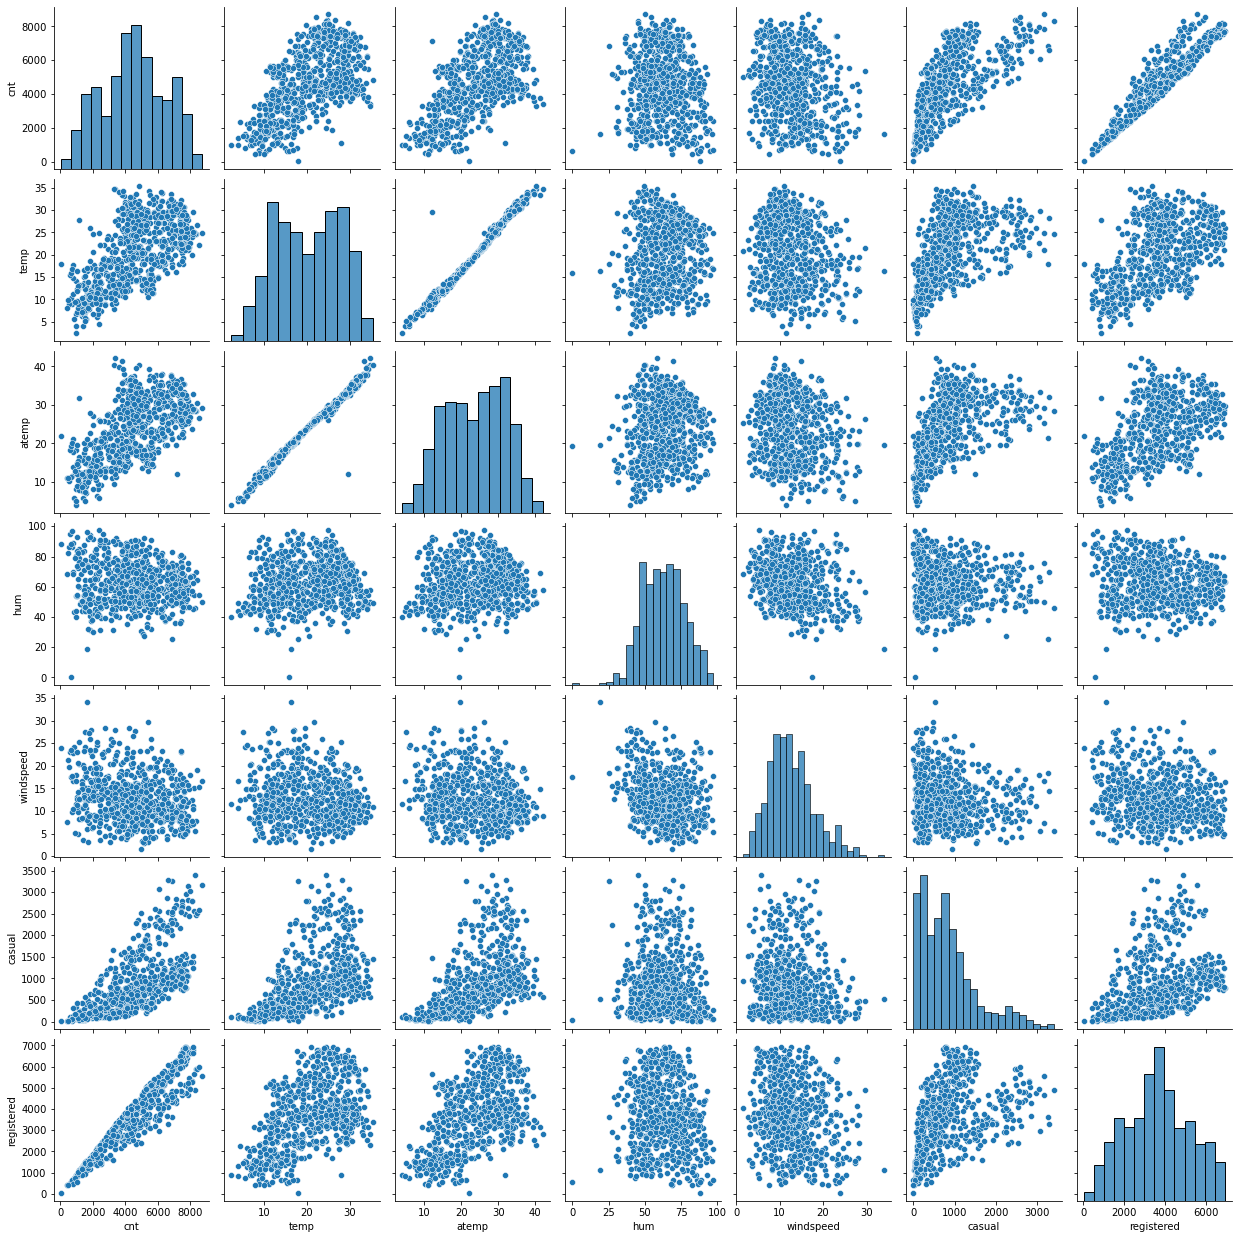

In [6]:
# Pairplot for all continuous variable

sns.pairplot(data=df_day,vars=['cnt', 'temp', 'atemp', 'hum','windspeed','casual','registered'])
plt.show()

### Visualising Categorical Variables

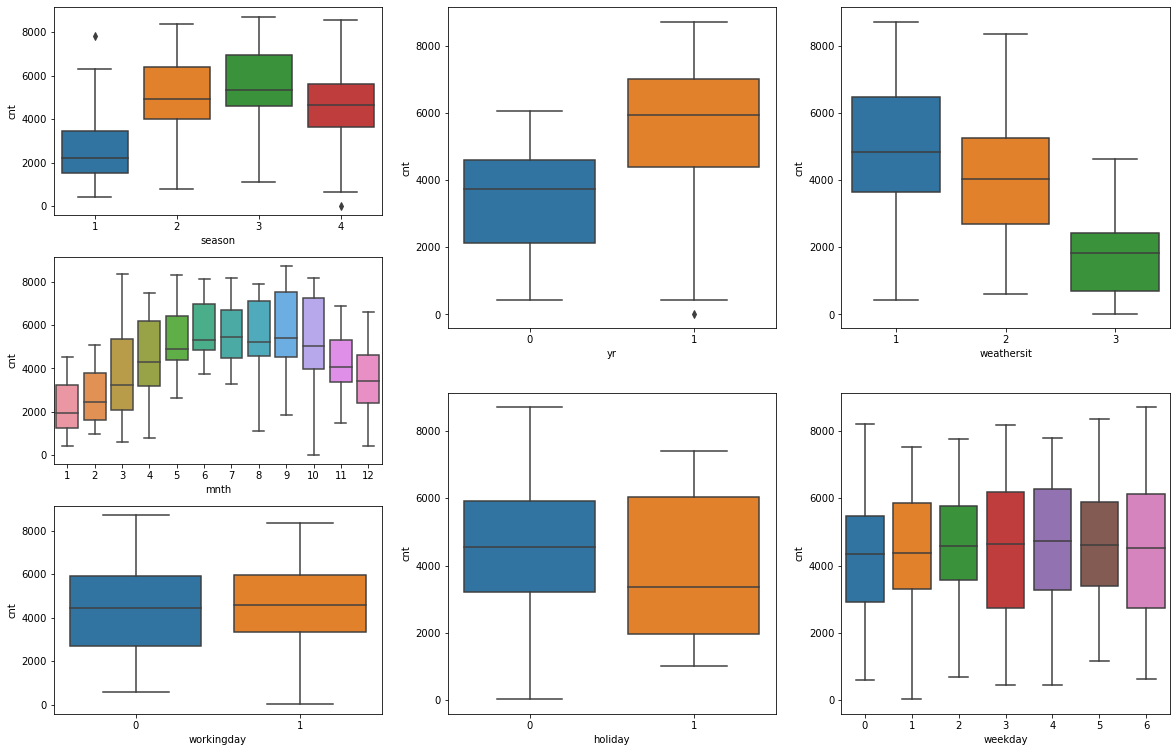

In [7]:
plt.figure(figsize=(20, 13))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_day)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_day)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_day)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_day)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_day)
plt.show()

### Observations

- The count of bike sharing is more during Clear, Few clouds, Partly cloudy, Partly cloudy
- The count of bike sharing is more during 2019 than 2018
- The count of bike sharing is 0 during Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- mean is almost simalar across all weekdays
- The count of bike sharing is least during spring season

# Step2: Data Preparation

In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#Formatting the column issue_d
df_day["dteday"] = pd.to_datetime(df_day["dteday"],format='%d-%m-%Y')
df_day["dte_date"] = df_day.dteday.dt.day

df_day["dte_month"] = df_day.dteday.dt.month
df_day["dte_year"] = df_day.dteday.dt.year

In [10]:
# Extracted Date from the solum dteday so dropping the same

df_day = df_day.drop('dteday',axis=1)

# Based on the above description, instant seems like a serial number so we can drop instant

df_day = df_day.drop('instant',axis=1)

# As we have the seperate columns for month(mnth) and year(yr), so no need to re-create the columns

df_day = df_day.drop('dte_month',axis=1)
df_day = df_day.drop('dte_year',axis=1)

### Dummy value population - season

In [11]:
# Converting the columns back to string based on data dictionary for having proper column names

df_day['season'] = df_day['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [12]:
# Creating Dummy variables for the column season
# Dropping the redundant dummy variable

status = pd.get_dummies(df_day['season'], drop_first=True)
status.head(3)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0


Here we no need all the 4 columns, we can drop the column fall and columns will be identifed as below,

- 000 will correspond to fall
- 100 will correspond to spring
- 010 will correspond to summer
- 001 will correspond to winter

In [13]:
# Concat the dummy variable data to the dataframe

df_day = pd.concat([df_day,status],axis=1)

# Dropping the season column

df_day = df_day.drop('season',axis=1)
df_day.head(2)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dte_date,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1,0,0


### Dummy value population - weathersit

In [14]:
# Converting the columns back to weathersit based on data dictionary for having proper column names

df_day['weathersit'] = df_day['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'})

In [15]:
# Creating Dummy variables for the column season
# Dropping the redundant dummy variable

status = pd.get_dummies(df_day['weathersit'], drop_first=True)
status.head(3)

,light_snow,mist
0,0,1
1,0,1
2,0,0


Here we no need all the 4 columns, we can drop the column fall and columns will be identifed as below,

- 00 will correspond to clear
- 10 will correspond to light_snow
- 01 will correspond to mist

In [16]:
# Concat the dummy variable data to the dataframe

df_day = pd.concat([df_day,status],axis=1)

# Dropping the season column

df_day = df_day.drop('weathersit',axis=1)
df_day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dte_date,spring,summer,winter,light_snow,mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,1,0,0,0,0


### Dummy value population - weekday

In [17]:
# Converting the columns back to weekday based on data dictionary for having proper column names

df_day['weekday'] = df_day['weekday'].map({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thrusday",5:"friday",6:"saturday"})

In [18]:
# Creating Dummy variables for the column season
# Dropping the redundant dummy variable

status = pd.get_dummies(df_day['weekday'], drop_first=True)
status.head(3)

,monday,saturday,sunday,thrusday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0


Here we no need all the 6 columns, we can drop the column friday and columns will be identifed as below,

- 000000 will correspond to friday
- 100000 will correspond to monday
- 010000 will correspond to saturday
- 001000 will correspond to sunday
- 000100 will correspond to thursday
- 000010 will correspond to tuesday
- 000001 will correspond to wednesday

In [19]:
# Concat the dummy variable data to the dataframe

df_day = pd.concat([df_day,status],axis=1)

# Dropping the season column

df_day = df_day.drop('weekday',axis=1)
df_day.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dte_date,spring,summer,winter,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0,0,0,1,0,1,0,0,0,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1,0,0,0,1,0,0,1,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,1,0,0,0,0,1,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,1,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,1,0,0,0,0,0,0,0,0,0,1


### Dummy value population - month

In [20]:
# Converting the columns back to weekday based on data dictionary for having proper column names

df_day['mnth'] = df_day['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [21]:
# Creating Dummy variables for the column season
# Dropping the redundant dummy variable

status = pd.get_dummies(df_day['mnth'], drop_first=True)
status.head(3)

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


Here we no need all the 6 columns, we can drop the column friday and columns will be identifed as below,

- 00000000000 will correspond to april
- 10000000000 will correspond to august
- 01000000000 will correspond to december
- 00100000000 will correspond to febaury
- 00010000000 will correspond to january
- 00001000000 will correspond to july
- 00000100000 will correspond to june
- 00000010000 will correspond to march
- 00000001000 will correspond to may
- 00000000100 will correspond to november
- 00000000010 will correspond to october
- 00000000001 will correspond to september

In [22]:
# Concat the dummy variable data to the dataframe

df_day = pd.concat([df_day,status],axis=1)

# Dropping the season column

df_day = df_day.drop('mnth',axis=1)
df_day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dte_date,spring,summer,winter,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# Its not possible to have the dummy variable for the date column
df_day = df_day.drop('dte_date',axis=1)

# Since the casual + registered = cnt and we can have one target variable so we can drop casual and registered
df_day = df_day.drop('registered',axis=1)
df_day = df_day.drop('casual',axis=1)

In [24]:
# Shape of the dataframe after creating dummy variables

df_day.shape

(730, 30)

# Step3: Training the Model

### Splitting the Data

In [25]:
# Splitting the Data into Training and Testing Sets

train, test = train_test_split(df_day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the column values

In [26]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['temp','atemp','hum','windspeed','cnt']

train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


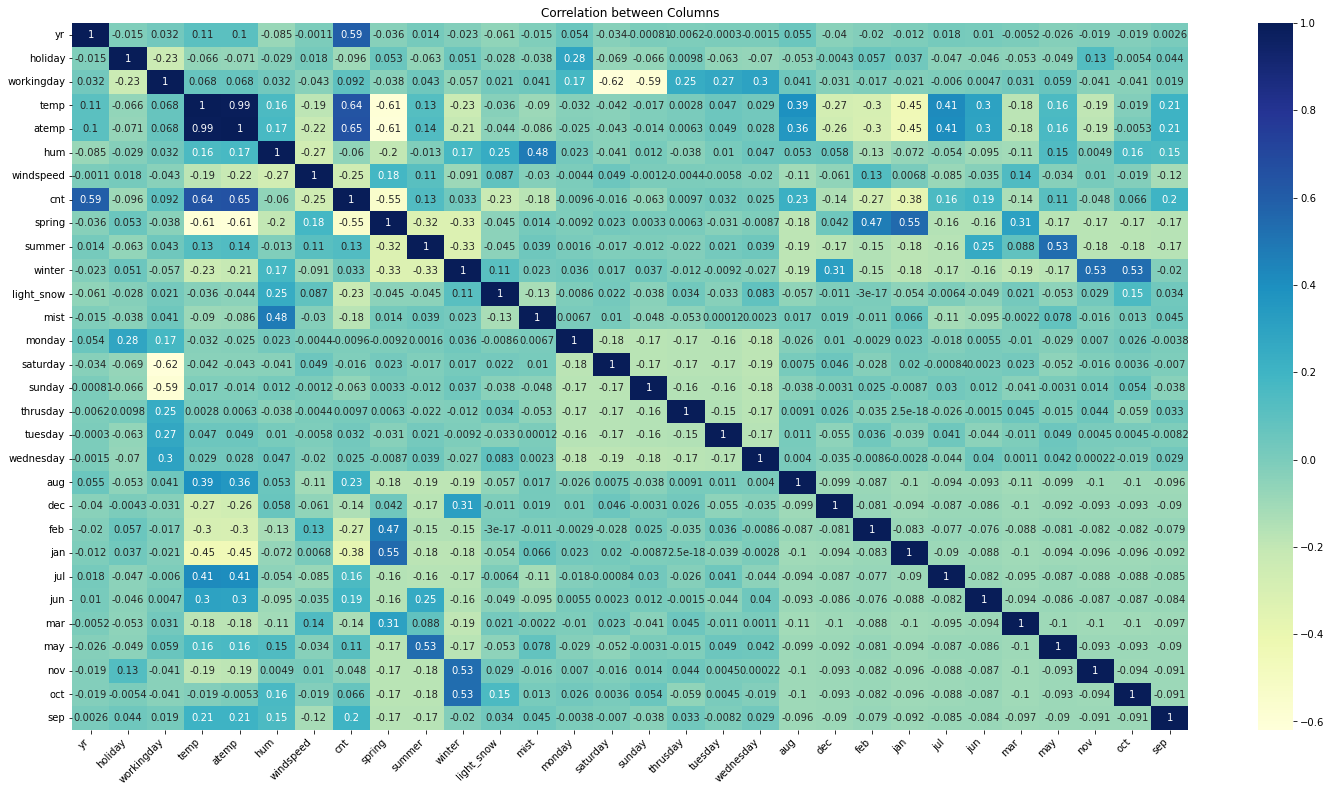

In [28]:
# Plotting Heat Map

plt.figure(figsize = (25, 13))
ax = sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
top, bottom = ax.get_ylim()
ax.set_ylim(top, bottom)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlation between Columns")
plt.show()

In [29]:
# X- train, y-train

y_train = train.pop('cnt')
X_train = train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Model 1 - OLS Regression Method

In [30]:
# add a constant
X_train_sm = sm.add_constant(X_train)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.42e-181
Time:                        20:49:06   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.035      6.953      0.000       0.176       0.315
yr             0.2322      0.008     28.792      0.000       0.216       0.248
holiday        0.0107      0.024      0.443      0.658      -0.037       0.058
workingday     0.0970      0.012      7.903      0.000       0.073       0.121
temp           0.4013      0.142      2.821      0.005       0.122       0.681
atemp          0.0506      0.138      0.366      0.714      -0.221       0.322
hum           -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed     -0.1844      0.026     -7.003      0.000      -0.236      -0.133
spring        -0.0486      0.030     -1.618      0.106      -0.108       0.010
summer         0.0382      0.026      1.455      0.146      -0.013       0.090
winter         0.1054      0.028      3.770      0.000       0.050       0.160
light_snow    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
mist          -0.0610      0.010     -5.845      0.000      -0.082      -0.041
monday        -0.0215      0.015     -1.395      0.164      -0.052       0.009
saturday       0.0961      0.014      6.984      0.000       0.069       0.123
sunday         0.0415      0.014      2.974      0.003       0.014       0.069
thrusday      -0.0097      0.016     -0.625      0.532      -0.040       0.021
tuesday       -0.0193      0.016     -1.242      0.215      -0.050       0.011
wednesday     -0.0057      0.015     -0.384      0.701      -0.035       0.024
aug            0.0161      0.034      0.473      0.637      -0.051       0.083
dec           -0.0456      0.034     -1.356      0.176      -0.112       0.020
feb           -0.0322      0.033     -0.978      0.329      -0.097       0.032
jan           -0.0626      0.034     -1.864      0.063      -0.129       0.003
jul           -0.0393      0.035     -1.116      0.265      -0.108       0.030
jun           -0.0017      0.025     -0.067      0.946      -0.051       0.048
mar            0.0013      0.025      0.052      0.958      -0.047       0.050
may            0.0247      0.021      1.169      0.243      -0.017       0.066
nov           -0.0418      0.036     -1.149      0.251      -0.113       0.030
oct            0.0077      0.036      0.215      0.830      -0.063       0.078
sep            0.0818      0.032      2.549      0.011       0.019       0.145
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.                     1.32e+16
==============================================================================

N

### Observation:
- Lot of columns are having the large P Value. Instead of dropping one by one we can go with RFE method

### Model 2 - RFE Method

In [31]:
# Training the model with RFE method

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 17)             # by reducing the value one by one, we finalised the value 17
rfe = rfe.fit(X_train, y_train)

#Columns with their weightage
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('light_snow', True, 1),
 ('mist', True, 1),
 ('monday', False, 5),
 ('saturday', True, 1),
 ('sunday', False, 2),
 ('thrusday', False, 11),
 ('tuesday', False, 12),
 ('wednesday', False, 9),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', True, 1),
 ('mar', False, 13),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 4),
 ('sep', False, 10)]

In [32]:
# Splitting the needed column based on weightage 
valid_col = X_train.columns[rfe.support_]
print('Column needed for Analysis:\n\n',valid_col)
print('\n\nColumn having high P Value and can be ignored for Analysis:\n\n', X_train.columns[~rfe.support_])

Column needed for Analysis:

 Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'light_snow', 'mist', 'saturday', 'aug', 'dec', 'jan', 'jul',
       'jun', 'nov'],
      dtype='object')


Column having high P Value and can be ignored for Analysis:

 Index(['atemp', 'summer', 'monday', 'sunday', 'thrusday', 'tuesday',
       'wednesday', 'feb', 'mar', 'may', 'oct', 'sep'],
      dtype='object')


In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[valid_col]

# add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
ls_rfe = sm.OLS(y_train,X_train_rfe).fit()

#summary
print(ls_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.47e-189
Time:                        20:49:06   Log-Likelihood:                 520.10
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     492   BIC:                            -928.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3103      0.033      9.352      0.0

### Observation:
- By reducing the column value one by one and we achieved the value 17
- Here we achieved the max R2 value with less P value
- Here holiday is not significant and we can drop that column

### Model 3 - removal of non significant column - holiday (based on P value) 

In [34]:
X_train_new = X_train_rfe.drop(['holiday'], axis=1)

In [35]:
# add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
ls_rfe = sm.OLS(y_train,X_train_rfe).fit()

#summary
print(ls_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.55e-189
Time:                        20:49:06   Log-Likelihood:                 518.24
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     493   BIC:                            -930.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3039      0.033      9.184      0.0

### Observation:
- Here jun is not significant and we can drop that column

### Model 4 - removal of non significant column - jun (based on P value) 

In [36]:
X_train_new = X_train_new.drop(['jun'], axis=1)

In [37]:
# add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
ls_rfe = sm.OLS(y_train,X_train_rfe).fit()

#summary
print(ls_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.30e-189
Time:                        20:49:06   Log-Likelihood:                 515.11
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     494   BIC:                            -930.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3047      0.033      9.159      0.0

### Observation:
- Here aug is not significant and we can drop that column

### Model 5 - removal of non significant column - aug (based on P value) 

In [38]:
X_train_new = X_train_new.drop(['aug'], axis=1)

In [39]:
# add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
ls_rfe = sm.OLS(y_train,X_train_rfe).fit()

#summary
print(ls_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.89e-189
Time:                        20:49:06   Log-Likelihood:                 512.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     495   BIC:                            -930.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3125      0.033      9.395      0.0

### Observation:
- Now all are significant and having least P value and this model is having 13 columns

### Checking VIF for Model 5

In [40]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [41]:
# VIFs for the Model 2 - RFE Method
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.12
2,temp,17.45
1,workingday,4.67
4,windspeed,4.14
6,winter,2.98
5,spring,2.96
8,mist,2.26
0,yr,2.07
9,saturday,1.83
13,nov,1.78


### Observation

- VIF should less than 5. So we need to drop the hum and check VIF again

### Model 6 - removal of non significant column - hum (based on VIF value) 

In [42]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [43]:
# VIFs for the Model 2 - RFE Method
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.33
1,workingday,4.56
3,windspeed,4.13
5,winter,2.56
4,spring,2.45
0,yr,2.07
8,saturday,1.82
12,nov,1.76
10,jan,1.67
7,mist,1.55


### Observation

- VIF should have lesser value.

### Model 6 - Final model

In [44]:
# add a constant
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
ls_rfe = sm.OLS(y_train,X_train_lm).fit()

#summary
print(ls_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.52e-188
Time:                        20:49:06   Log-Likelihood:                 506.31
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     496   BIC:                            -925.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2441      0.027      9.153      0.0

# Step4: Residual Analysis
- To check the error are also normally distributed using histogram

In [45]:
y_train_lm = ls_rfe.predict(X_train_lm)

Text(0, 0.5, 'Density')

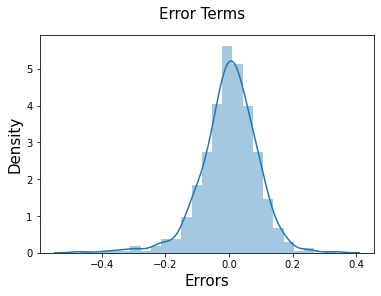

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_lm), bins = 25)
fig.suptitle('Error Terms', fontsize = 15) 
plt.xlabel('Errors', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

### Observation

- Errors are also normally distributed

# Step5: Prediction and Analysis the Test Set

In [47]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['temp','atemp','hum','windspeed','cnt']

test[num_vars] = scaler.fit_transform(test[num_vars])
test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Dividing into X test and y test

In [48]:
y_test = test.pop('cnt')
X_test = test

In [49]:
# now lets use our model to make prediction
test_col = X_train_lm.columns

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[test_col[1:]]

# Adding constant to new dataframe
X_test_new = sm.add_constant(X_test_new)

X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   windspeed   219 non-null    float64
 5   spring      219 non-null    uint8  
 6   winter      219 non-null    uint8  
 7   light_snow  219 non-null    uint8  
 8   mist        219 non-null    uint8  
 9   saturday    219 non-null    uint8  
 10  dec         219 non-null    uint8  
 11  jan         219 non-null    uint8  
 12  jul         219 non-null    uint8  
 13  nov         219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(9)
memory usage: 12.2 KB


In [50]:
# making prediction with Final model
y_pred = ls_rfe.predict(X_test_new)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8039320007480326

In [52]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.011120652263985413

### Model Evaluation

Text(0, 0.5, 'y_pred')

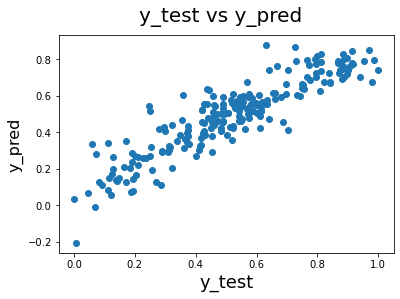

In [53]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [54]:
param = pd.DataFrame(ls_rfe.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.412155
0,const,0.244055
1,yr,0.234608
6,winter,0.069368
9,saturday,0.066760
2,workingday,0.054321
11,jan,-0.057768
10,dec,-0.058544
13,nov,-0.059103


We can see the equation for the best fitted line is:

**cnt = 0.244055 + (0.412155 * temp) + (0.234608 * yr) - (0.296155 * light_snow) - (0.163490 * windspeed) - (0.105609* spring) - (0.081541 * mist) - (0.071054 * jul) + (0.069368 * winter) + (0.066760 * saturday) + (0.054321 * workingday) - (0.059103 * nov) - (0.058544 * dec) - (0.057768 * jan)**

All the positive coefficients like temp, yr, jul, winter, saturday, workingday indicate that an increase in these values will lead to an increase in the value of cnt.

All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.

### Business Conclusion:

- Temp and year(2019) is the most significant with the largest coefficient
- Followed by weathesit - Light Snow & Rain
- Bike rentals is more during workingday
- Bike rentals is more for the month of July

This indicates that the bike rentals is majorly affected by temperature, season, month and workingday / holiday.